# Случайный лес

Алгоритм случайного леса (Random Forest) — универсальный алгоритм машинного обучения, суть которого состоит в использовании ансамбля решающих деревьев. 

Само по себе решающее дерево предоставляет крайне невысокое качество классификации, но из-за большого их количества результат значительно улучшается. Также это один из немногих алгоритмов, который можно использовать в абсолютном большинстве задач.

Благодаря своей гибкости Random Forest применяется для решения задач классификации, регрессии, а также более сложные задачи, вроде отбора признаков, поиска выбросов/аномалий и кластеризации.

# Лабораторная работа

In [2]:
# Используемые библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

#inline matplotlib

In [3]:
# Загрузка датасета
wine = datasets.load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


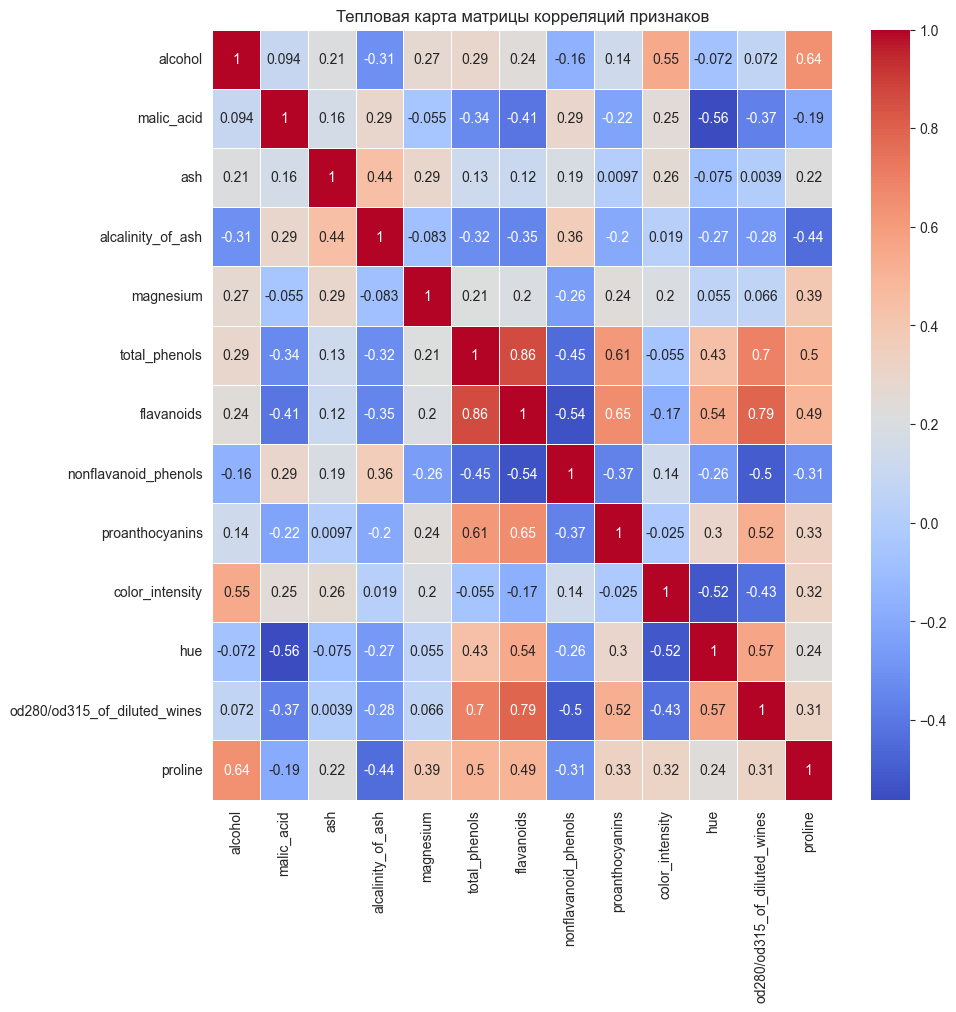

In [4]:
# Получаем матрицу корреляций
correlation_matrix = wine_df.corr()

# Строим тепловую карту
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Тепловая карта матрицы корреляций признаков')
plt.show()

In [5]:
# Отбор признаков
# Порог корреляции = 0.65

columns_to_drop = ['flavanoids', 'proanthocyanins', 'od280/od315_of_diluted_wines']
wine_df.drop(columns=columns_to_drop, inplace=True)

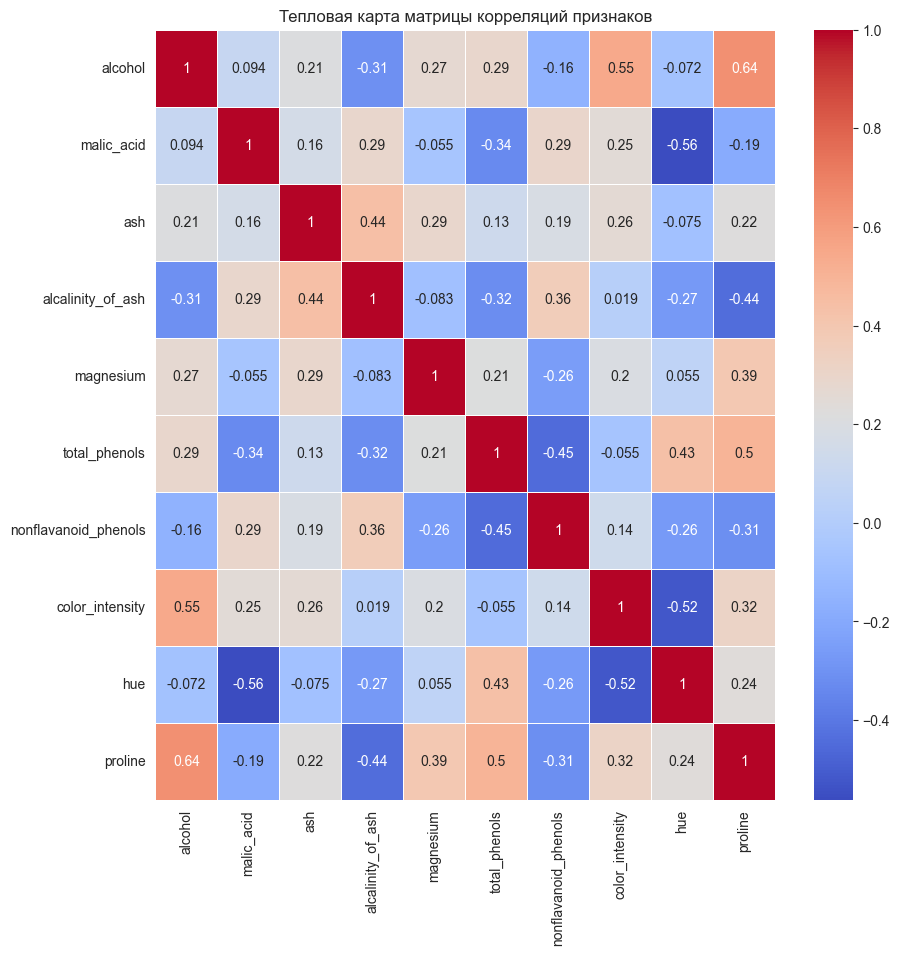

In [6]:
correlation_matrix = wine_df.corr()

# Строим тепловую карту
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Тепловая карта матрицы корреляций признаков')
plt.show()

In [7]:
# Получение выборок

X = wine_df
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
# Обучение модели

model = RandomForestClassifier(n_estimators=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.9444444444444444

In [9]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
col = wine_df.columns

ar_f=[]
for f, idx in enumerate(indices):
    ar_f.append([round(importances[idx],4), col[idx]])
print("Значимость признака:")
ar_f.sort(reverse=True)
ar_f

Значимость признака:


[[0.2314, 'color_intensity'],
 [0.2034, 'hue'],
 [0.1936, 'proline'],
 [0.1437, 'alcohol'],
 [0.0756, 'malic_acid'],
 [0.0571, 'total_phenols'],
 [0.038, 'alcalinity_of_ash'],
 [0.0223, 'magnesium'],
 [0.0192, 'ash'],
 [0.0157, 'nonflavanoid_phenols']]

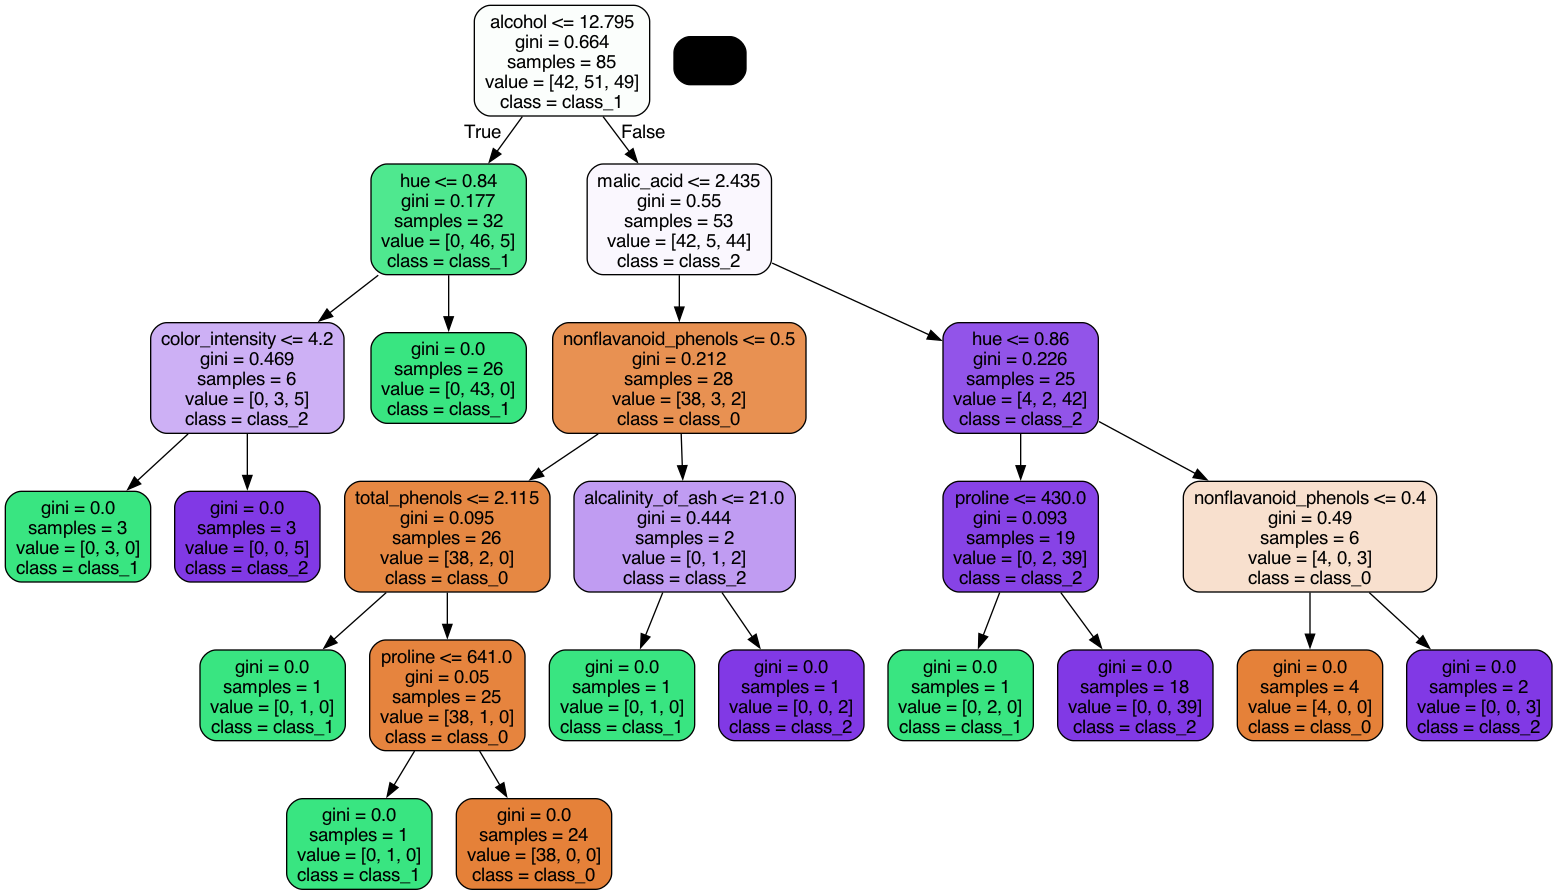

In [11]:
# Визуализация отдельного дерева из леса
tree = model.estimators_[0] 
# Создаем dot файл для визуализации
export_graphviz(tree, out_file='tree1.dot', feature_names=wine_df.columns,
                class_names=wine.target_names, rounded=True, filled=True)

# Конвертируем dot файл в изображение
graph = pydotplus.graph_from_dot_file('tree1.dot')
Image(graph.create_png())

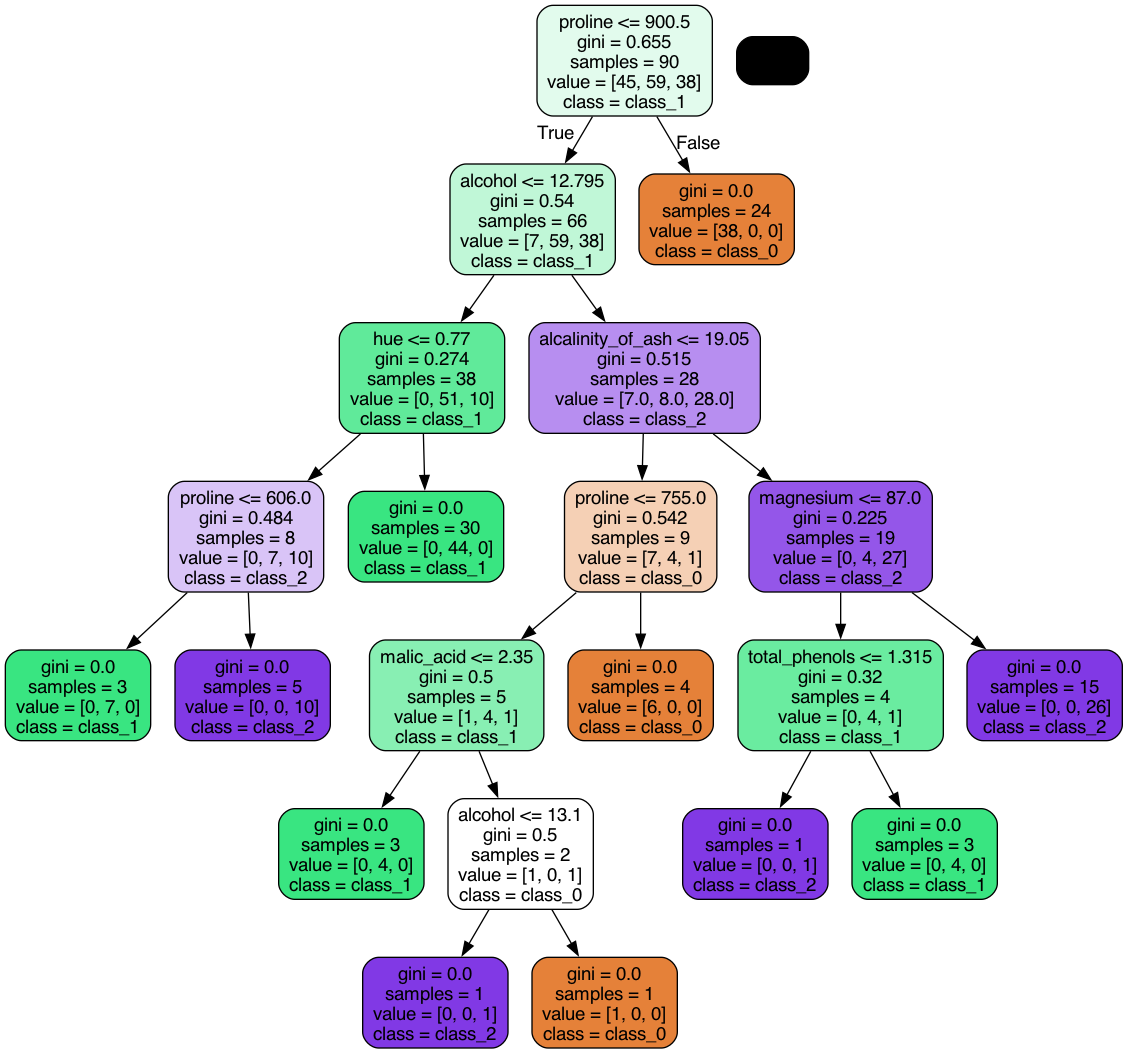

In [12]:
# Визуализация отдельного дерева из леса
tree = model.estimators_[1] 
# Создаем dot файл для визуализации
export_graphviz(tree, out_file='tree2.dot', feature_names=wine_df.columns,
                class_names=wine.target_names, rounded=True, filled=True)

# Конвертируем dot файл в изображение
graph = pydotplus.graph_from_dot_file('tree2.dot')
Image(graph.create_png())

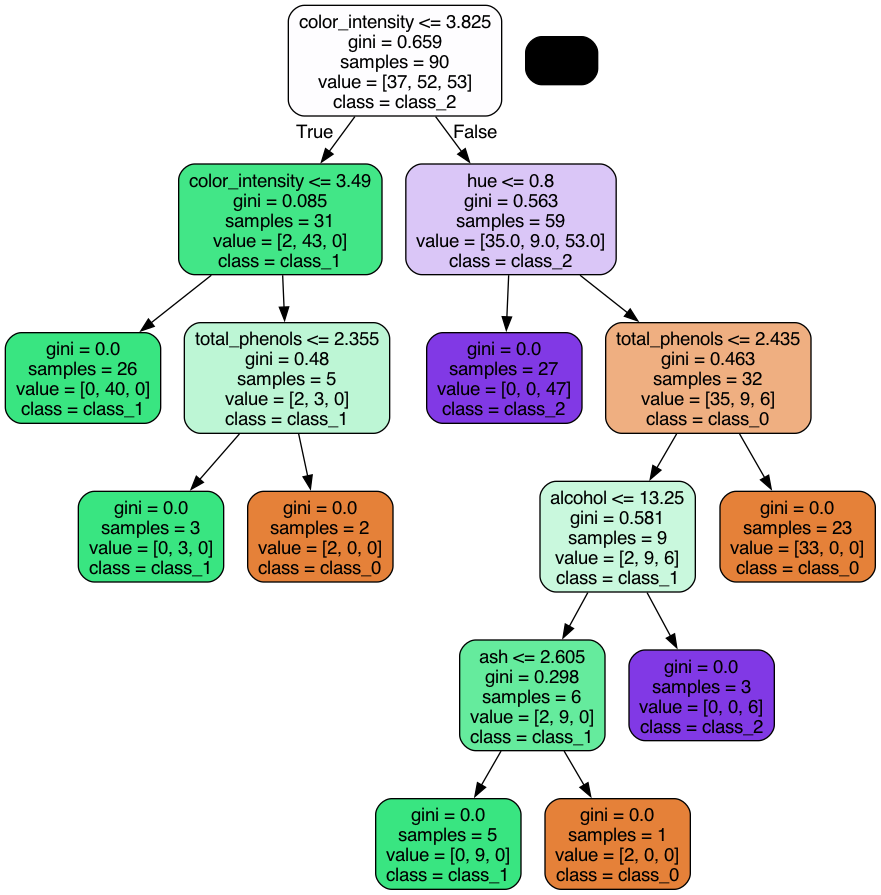

In [13]:
# Визуализация отдельного дерева из леса
tree = model.estimators_[2] 
# Создаем dot файл для визуализации
export_graphviz(tree, out_file='tree2.dot', feature_names=wine_df.columns,
                class_names=wine.target_names, rounded=True, filled=True)

# Конвертируем dot файл в изображение
graph = pydotplus.graph_from_dot_file('tree2.dot')
Image(graph.create_png())

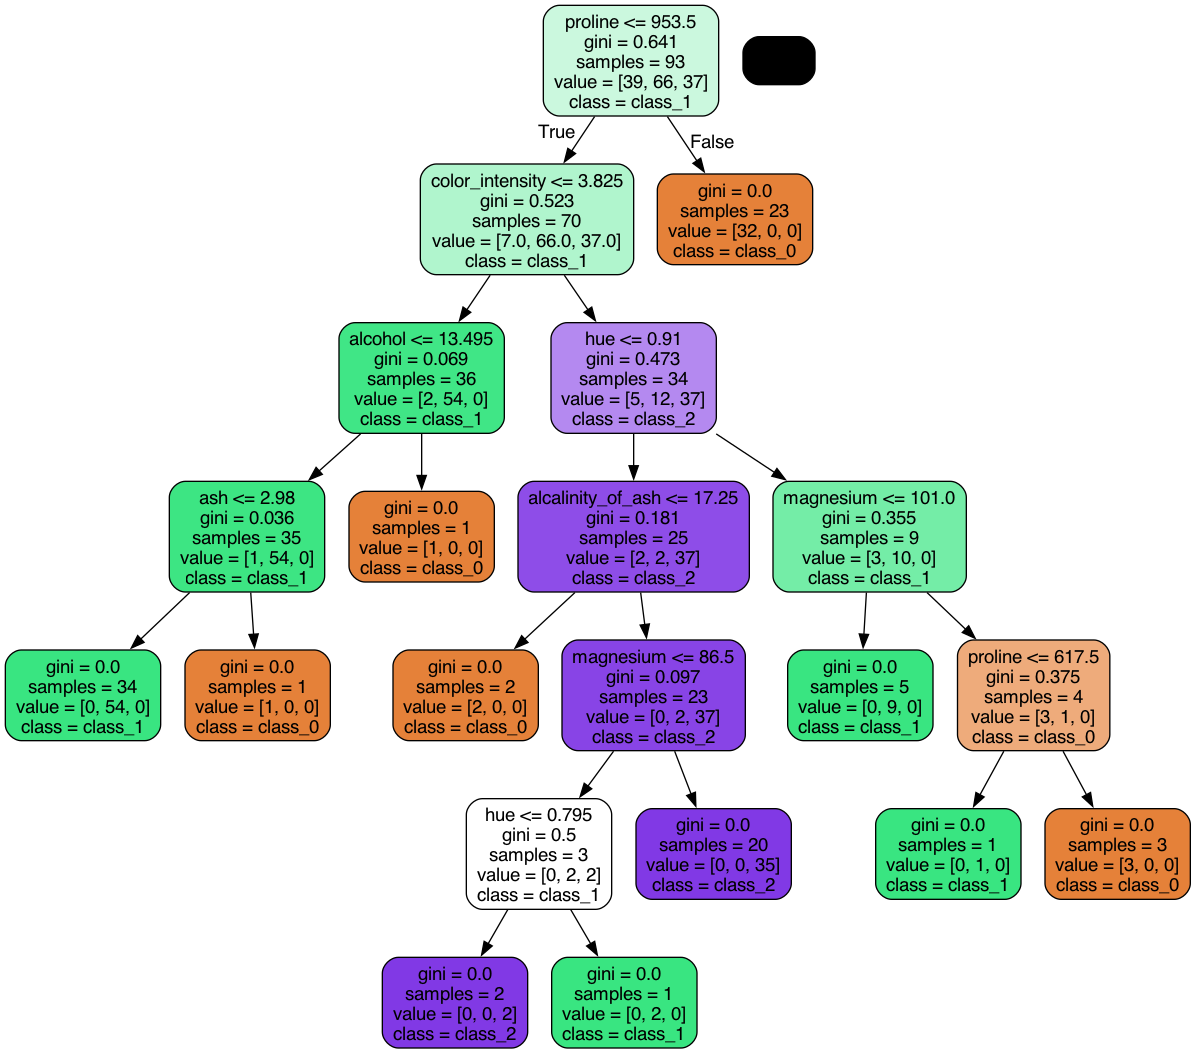

In [14]:
# Визуализация отдельного дерева из леса
tree = model.estimators_[3] 
# Создаем dot файл для визуализации
export_graphviz(tree, out_file='tree3.dot', feature_names=wine_df.columns,
                class_names=wine.target_names, rounded=True, filled=True)

# Конвертируем dot файл в изображение
graph = pydotplus.graph_from_dot_file('tree3.dot')
Image(graph.create_png())

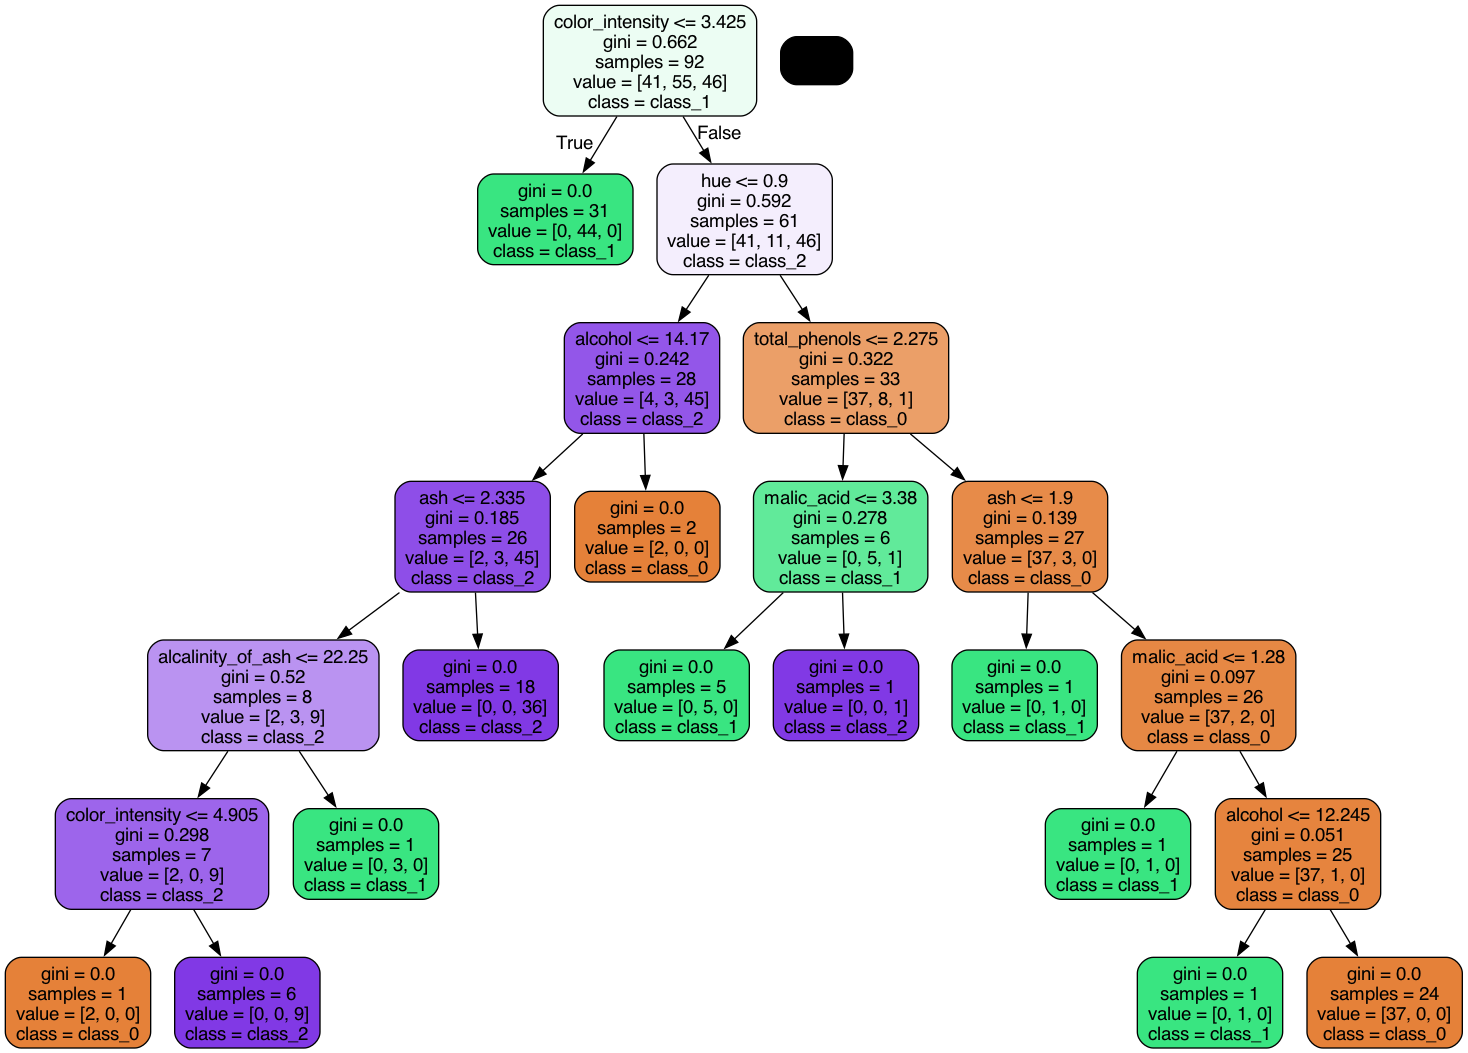

In [15]:
# Визуализация отдельного дерева из леса
tree = model.estimators_[4] 
# Создаем dot файл для визуализации
export_graphviz(tree, out_file='tree4.dot', feature_names=wine_df.columns,
                class_names=wine.target_names, rounded=True, filled=True)

# Конвертируем dot файл в изображение
graph = pydotplus.graph_from_dot_file('tree4.dot')
Image(graph.create_png())